# Проект: Приоритизация гипотез и анализ результатов A/B-теста.

# Описание проекта.

Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать полученные результаты теста. 

# Цель проекта.

Приоритизировать гипотезы и проанализировать результаты A/B-теста.

# План работ.

**Часть 1. Приоритизация гипотез.**

В файле `/datasets/hypothesis.csv` собраны 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Необходимо:
* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортирвать их по убыванию приоритета.

Написать вывод. В выводе отразить, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста**

A/B-тест проведён, результаты находятся в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

Необходимо проанализировать A/B-тест по следующим пунктам:
* Построить график кумулятивной выручки по группам. Сформулировать выводы и предположения.
* Построить график кумулятивного среднего чека по группам. Сформулировать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сформулировать выводы и предположения.
* Построить график кумулятивного среднего количества заказов на посетителя по группам. Сформулировать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сформулировать выводы и предположения.
* Построить точечный график количества заказов по пользователям. Сформулировать выводы и предположения.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. Сформулировать выводы и предположения.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сформулировать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сформулировать выводы и предположения.
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сформулировать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сформулировать выводы и предположения.

По результатам анализа принять один из трех вариантов решения:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Обосновать принятое решение.

Написать вывод.

# Выполнение проекта.

## Подготовительный этап.

### Импорт необходимых библиотек и загрузка исходных данных.

In [1]:
# импорт необходимых библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# загрузка исходных данных
try :
    hyp = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    print('Данные загружены из каталога Yandex Practicum.')

except :
    hyp = pd.read_csv('res/hypothesis.csv')
    orders = pd.read_csv('res/orders.csv')
    visitors = pd.read_csv('res/visitors.csv')
    print('Данные загружены из локального каталога.')

Данные загружены из каталога Yandex Practicum.


Посмотрим на результат загрузки данных:

In [3]:
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Приведем названия столбцов к нормальному формату и проверим результат:

In [4]:
hyp.columns = hyp.columns.str.lower()
hyp

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Поправим названия первых двух столбцов на более удобные для восприятия и проверим результат:

In [6]:
orders.columns = ['order_id', 'user_id', 'date', 'revenue', 'group']
orders.head()

,order_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверим общую информацию:

In [8]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  1197 non-null   int64 
 1   user_id   1197 non-null   int64 
 2   date      1197 non-null   object
 3   revenue   1197 non-null   int64 
 4   group     1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Видим, что дата сохранена как текст - необходимо преобразовать:

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  1197 non-null   int64         
 1   user_id   1197 non-null   int64         
 2   date      1197 non-null   datetime64[ns]
 3   revenue   1197 non-null   int64         
 4   group     1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Теперь дата в нужном формате, ОК.

In [11]:
orders.duplicated().sum()

0

Узнаем общее количество заказов:

In [12]:
orders['order_id'].nunique()

1197

Узнаем общее количество пользователей:

In [13]:
orders['user_id'].nunique()

1031

Проверим минимальную и максимальную даты:

In [14]:
print('Минимальная дата заказа:', orders['date'].min())
print('Максимальная дата заказа:', orders['date'].max())

Минимальная дата заказа: 2019-08-01 00:00:00
Максимальная дата заказа: 2019-08-31 00:00:00


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Видим, что здесь тоже дата сохранена как текст - тоже выполним преобразование:

In [16]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [17]:
visitors.duplicated().sum()

0

In [18]:
print('Дата начала теста:', visitors['date'].min())
print('Последняя дата теста:', visitors['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Последняя дата теста: 2019-08-31 00:00:00


### Результат загрузки данных.

Данные загружены в датафреймы:
* `hyp` - данные по гипотезам. Пропусков нет. Содержит записи о 9 гипотезах.
* `orders` - данные по заказам. Пропусков нет. Содержит 1197 записей, дубликатов нет. Уникальных транзакций - 1197, уникальных пользователей - 1031. Минимальная дата заказа: 2019-08-01. Максимальная дата заказа: 2019-08-31
* `visitors` - данные по датам и количеству пользователей. Пропусков нет, дубликатов нет. Содержит данные за период с 01.08.2019 по 31.08.2019 - полный календарный месяц. Период полностью совпадает с периодом предыдущего датафрейма.

В датафрейме `orders` переименованы два столбца для улучшения восприятия. В датафреймах `orders`и `visitors`дата из формата `object` приведена к формату `datetime64`.

## Часть 1. Приоритизация гипотез.

Выведем гипотезы на экран:

In [19]:
pd.set_option('display.max_colwidth', 150)
hyp

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### ICE. Применение фреймворка.

In [20]:
hyp['ice'] = hyp['impact'] * hyp['confidence'] / hyp['efforts']
hyp[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).style.format({'ice' : '{:.2f}'})

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Самый высокий ICE-рейтинг у гипотезы под номером 8: 

"Запустить акцию, дающую скидку на товар в день рождения".

#### RICE. Применение фреймворка.

In [21]:
hyp['rice'] = hyp[['reach','impact','confidence']].prod(axis=1) / hyp['efforts']
hyp[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).style.format({'rice' : '{:.2f}'})

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Самый высокий RICE-рейтинг у гипотезы под номером 7:

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

#### Вывод: Приоритизация гипотез.

Различные методики дают различные результаты, что, в принципе, нормально. Конкретно в нашем случае ICE является упрощенной моделью RICE, которая учитывает 3 параметра вместо 4х.

Самый высокий ICE-рейтинг у гипотезы под номером 8: "Запустить акцию, дающую скидку на товар в день рождения".

Самый высокий RICE-рейтинг у гипотезы под номером 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Для нас предпочтительнее метод RICE - охват, параметр, отсутствующий в ICE, весьма важен, чтобы его игнорировать. Особенно при условии, что мы распологаем полным набором данных и для расчета RICE, и для расчета усеченного варианта - ICE.

Для проверки выбираем гипотезу:

**"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".**

## Часть 2. Анализ A/B-теста

Подготовим общие данные:

In [22]:
# сгруппируем данные о заказах по дате и группе, уберем дубликаты
datesGroups = orders[['date', 'group']].drop_duplicates()

# соберем кумулятивные данные в один датафрейм
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'order_id': 'nunique',
            'user_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

ordersAggregated.head()

,date,group,order_id,user_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Часть данных готова. Названия двух столбцов - `order_id` и `user_id` - теперь не отражают суть находящихся в них данных. Просто имеем это ввиду, переименуем их в итоговом датафрейме чуть позже.

In [23]:
# подготовим кумулятивные данные по датам, группам и посетителям:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [24]:
# объединим данные по заказам, покупателям и посетителям в один датафрейм:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
# переименуем названия столбцов для соответствия хранимым в них данным:
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### График кумулятивной выручки по группам. 

Теперь подготовим данные по группам и построим графики:

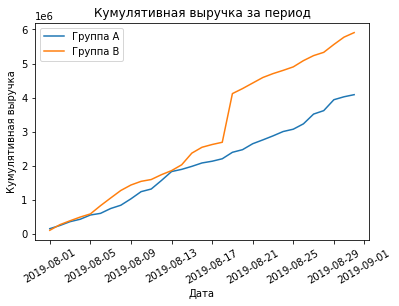

In [25]:
# датафрейм с кумулятивным количеством заказов, кумулятивным количеством посетителей 
# и кумулятивной выручкой по дням в группе А
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов, кумулятивным количеством посетителей 
# и кумулятивной выручкой по дням в группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

# Строим график выручки группы А
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='Группа A')

# Строим график выручки группы B
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='Группа B')

plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=30)
plt.title('Кумулятивная выручка за период')
plt.legend();

На графике виден резкий скачок. Посмотрим на индекс прироста выручки:

In [26]:
t1 = cumulativeDataB[['date', 'revenue']][:].reset_index(drop=True)
t1['revenue_ratio'] = t1.revenue / t1.revenue.shift() - 1
t1.style.format({'revenue_ratio' : '{:.1%}'})

,date,revenue,revenue_ratio
0,2019-08-01 00:00:00,101217,nan%
1,2019-08-02 00:00:00,266748,163.5%
2,2019-08-03 00:00:00,380996,42.8%
3,2019-08-04 00:00:00,489567,28.5%
4,2019-08-05 00:00:00,581995,18.9%
5,2019-08-06 00:00:00,824337,41.6%
6,2019-08-07 00:00:00,1049671,27.3%
7,2019-08-08 00:00:00,1270589,21.0%
8,2019-08-09 00:00:00,1431401,12.7%
9,2019-08-10 00:00:00,1539203,7.5%


19 августа произошла аномалия в группе B. Скорре всего, аномально крупный заказ. Точно можно будет сказать позже, когда проанализируем средний чек.

15 августа тоже наблюдается выброс.

#### Выводы и предположения: График кумулятивной выручки по группам.

В сырых данных имеются аномалии. Начало периода теста хаотично, что является нормой. Стабилизация происходит к концу первой декады проведения теста. Затем наблюдаются 2 выброса - 15 и 19 августа. Максимальный - 19 августа.

Группа В показывает результат лучше группы А.

### График кумулятивного среднего чека по группам. 

Все необходимые данные у нас уже есть, построим сами графики:

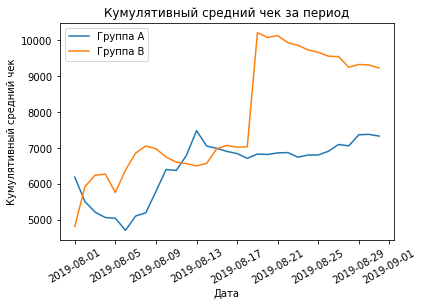

In [27]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label='Группа B')

plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.xticks(rotation=30)
plt.title('Кумулятивный средний чек за период')

plt.legend();

Тоже скачок, как на выручке, и тоже в группе B. Добавим индекс изменения среднего чека:

In [28]:
t1 = cumulativeDataB[['date', 'orders', 'revenue']][:].reset_index(drop=True)
t1['aov'] = t1['revenue'] / t1['orders']
t1['aov_ratio'] = t1.aov / t1.aov.shift() - 1
t1.style.format({'aov' : '{:.2f}', 'aov_ratio' : '{:.1%}'})

,date,orders,revenue,aov,aov_ratio
0,2019-08-01 00:00:00,21,101217,4819.86,nan%
1,2019-08-02 00:00:00,45,266748,5927.73,23.0%
2,2019-08-03 00:00:00,61,380996,6245.84,5.4%
3,2019-08-04 00:00:00,78,489567,6276.50,0.5%
4,2019-08-05 00:00:00,101,581995,5762.33,-8.2%
5,2019-08-06 00:00:00,129,824337,6390.21,10.9%
6,2019-08-07 00:00:00,153,1049671,6860.59,7.4%
7,2019-08-08 00:00:00,180,1270589,7058.83,2.9%
8,2019-08-09 00:00:00,205,1431401,6982.44,-1.1%
9,2019-08-10 00:00:00,228,1539203,6750.89,-3.3%


Так как в этот же день аномально выросла не только выручка, но и средний чек, можно утверждать, что имел место аномально большой заказ в группе B.
15 августа также есть выброс, но меньший.

#### Выводы и предположения: График кумулятивного среднего чека по группам.

Картина такая же, как и с выручкой. Стабилизация параметров наблюдается к концу первой декады наблюдений. Затем наблюдаются 2 выброса - 15 и 19 августа. Максимальный - 19 августа.

Теперь можно утверждать, что это влияние аномально крупных заказов.

Группа В показывает результат лучше группы А.

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

Подготовим необходимые данные и построим график:

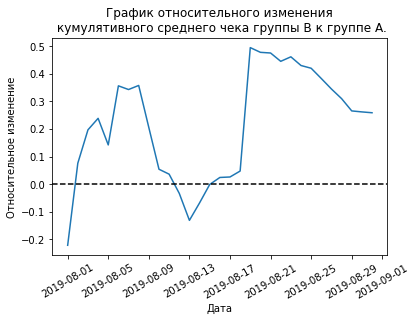

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', 
                                             how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeData['date'], 
         (mergedCumulativeData['revenueB']/mergedCumulativeData['ordersB'])
         /(mergedCumulativeData['revenueA']/mergedCumulativeData['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=30)
plt.title('График относительного изменения\n кумулятивного среднего чека группы B к группе A.');

#### Выводы и предположения: График относительного изменения кумулятивного среднего чека группы B к группе A.

Стабилизация параметров наступает к концу второй декады наблюдений. После резкого роста (выброс от 19 августа) начинается плавное снижение - корректировка выброса. Резкие колебания после выброса больше не наблюдаются.

Группа В показывает результат лучше группы А.

### График кумулятивного среднего количества заказов на посетителя по группам. 

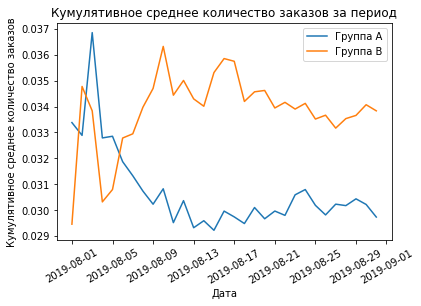

In [30]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['orders']/cumulativeDataA['visitors'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['orders']/cumulativeDataB['visitors'], label='Группа B')

plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов')
plt.xticks(rotation=30)
plt.title('Кумулятивное среднее количество заказов за период')

plt.legend();

#### Выводы и предположения: График кумулятивного среднего количества заказов на посетителя по группам.

Параметры стабилизируются к концу первой декады наблюдений.

Группа В показывает результат лучше группы А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

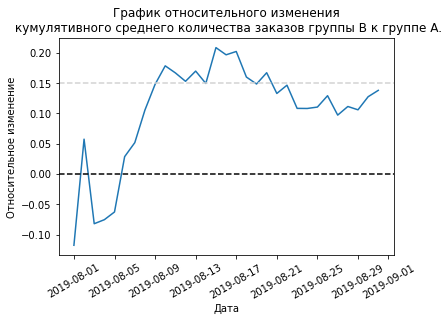

In [31]:
# cтроим отношение среднего количества заказов
plt.plot(mergedCumulativeData['date'], 
         (mergedCumulativeData['ordersB']/mergedCumulativeData['visitorsB'])
         /(mergedCumulativeData['ordersA']/mergedCumulativeData['visitorsA'])-1)

# добавляем оси X
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.15, color='lightgray', linestyle='--') 

plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=30)
plt.title('График относительного изменения\n кумулятивного среднего количества заказов группы B к группе A.');

#### Выводы и предположения: График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

После стабилизации, которая также наблюдается к конце первой декады наблюдений, график стабильно держится в положительной зоне.

Группа В показывает результат лучше группы А.

### Точечный график количества заказов по пользователям. 

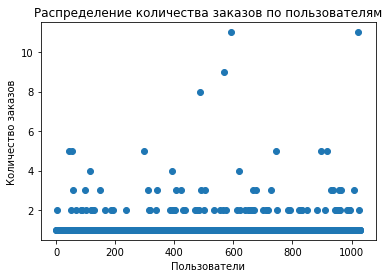

In [32]:
ordersByUsers = (
    orders.groupby('user_id', as_index=False)
    .agg({'order_id': 'nunique'})
)
ordersByUsers.columns = ['user_id', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title('Распределение количества заказов по пользователям');

#### Выводы и предположения: Точечный график количества заказов по пользователям.

На графике хорошо видны выбросы.
Основное количество заказов по пользователям - это 1 или 2.

### Расчет 95 и 99 перцентиля количества заказов на пользователя. 

In [33]:
percentile_list = [95, 99]
for i in percentile_list :
    p_tmp = np.percentile(ordersByUsers['orders'], [i])
    p_tmp = p_tmp[0]
    print(f'{i} перцентиль количества заказов равен: {p_tmp:.0f}')

95 перцентиль количества заказов равен: 2
99 перцентиль количества заказов равен: 4


#### Определение границы для аномальных пользователей.

Как и график, расчет перцентилей дает нам границу для определения аномальных пользователей.

На основании графика и расчета установим границу количества заказов на пользователя: 2. 

Свыше этого количество заказов принимаем как аномальное.

### Точечный график стоимостей заказов. 

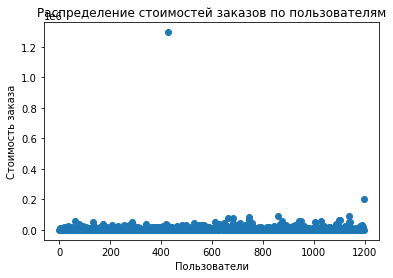

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.title('Распределение стоимостей заказов по пользователям');

Основная масса заказов приходится на заказы существенно ниже 100К. Видны выбросы.

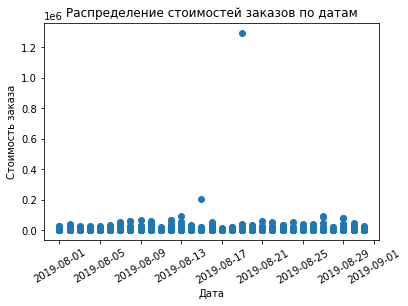

In [35]:
plt.scatter(orders['date'], orders['revenue'])

plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Стоимость заказа')
plt.title('Распределение стоимостей заказов по датам');

На этом графике, как и на предыдущем, хорошо видны 2 выброса. Этот график построен только для того, чтобы сопоставить выбросы с датами и подтвердить наши промежуточные выводы - 19 августа максимальный выброс, 15 - августа второй по величине.

#### Выводы и предположения: Точечный график стоимостей заказов.

Наблюдаются выбросы. Основная масса заказов приходится на заказы существенно ниже 100К. Точную сумму границы определим после расчета перцентилей.

### Расчет 95 и 99 перцентиля стоимости заказов. 

In [36]:
percentile_list = [95, 99]
for i in percentile_list :
    p_tmp = np.percentile(orders['revenue'], [i]).round(1)
    p_tmp = p_tmp[0]
    print(f'{i} перцентиль суммы заказа равен: {p_tmp}')

95 перцентиль суммы заказа равен: 28000.0
99 перцентиль суммы заказа равен: 58233.2


#### Определение границы для аномальных заказов.

На основании графика и расчета принимаем границу стоимости заказа: 28000. 

Выше - аномалии.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Сформулируем гипотезы:
* Нулевая: **статистически значимых различий в среднем количестве заказов между группами нет.**
* Альтернативная: **статистически значимые различия в среднем количестве заказов между группами есть.**

Подготовим данные для расчета:

In [37]:
# выберем по дням количество посетителей из группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# посчитаем их кумулятивное количество
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

# присвоим правильные названия столбцам
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [38]:
# выберем по дням количество посетителей из группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# посчитаем их кумулятивное количество
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)

# присвоим правильные названия столбцам
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [39]:
# выберем по дням количество заказов и их суммы из группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# посчитаем их кумулятивные значения
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

# присвоим правильные названия столбцам
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [40]:
# выберем по дням количество заказов и их суммы из группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# посчитаем их кумулятивные значения
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

# присвоим правильные названия столбцам
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [41]:
# объединим по дате ранее подготовленные данные в один датафрейм
data = (
    ordersADaily
    .merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [42]:
# выберем заказы только для группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)

# переименуем столбцы
ordersByUsersA.columns = ['user_id', 'orders']
ordersByUsersA.head()

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [43]:
# выберем заказы только для группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('user_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)

# переименуем столбцы
ordersByUsersB.columns = ['user_id', 'orders']
ordersByUsersB.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [44]:
# для группы А создадим переменную sampleA с число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

# для группы В создадим переменную sampleB с число заказов пользователя, а пользователям без заказов — нули
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)

res = stats.mannwhitneyu(sampleA, sampleB)
print(f'Значение критерия Манна-Уитни для среднего количества заказов групп A и B = {res[1]:.3f}')

Значение критерия Манна-Уитни для среднего количества заказов групп A и B = 0.017


Значение критерия Манна-Уитни по "сырым" данным составляет 0.017, что меньше 0.05.
Таким образом, на основании полученного результата нулевую гипотезу отвергаем и принимаем альтернативную:

**статистически значимые различия в среднем количестве заказов между группами есть.**

In [45]:
print('Разница между средним количеством заказов групп B и A составляет {0:.1%}'
      .format(sampleB.mean() / sampleA.mean() - 1))

Разница между средним количеством заказов групп B и A составляет 13.8%


#### Выводы и предположения: Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Значение критерия Манна-Уитни по "сырым" данным составляет 0.017, что меньше 0.05.
Таким образом, на основании полученного результата нулевую гипотезу отвергаем и принимаем альтернативную:

**статистически значимые различия в среднем количестве заказов между группами есть.**

Разница между средним количеством заказов групп B и A составляет 13.8%

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. 

Сформулируем гипотезы:
* Нулевая: **статистически значимых различий в среднем чеке между группами нет.**
* Альтернативная: **статистически значимые различия в среднем чеке между группами есть.**

In [46]:
res = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print(f'Значение критерия Манна-Уитни для среднего чека групп A и B = {res[1]:.3f}')

Значение критерия Манна-Уитни для среднего чека групп A и B = 0.729


Значение критерия Манна-Уитни по "сырым" данным составляет 0.729, что существенно выше 0.05. Таким образом, на основании полученного результата нулевую гипотезу отвергнуть не можем.

Принимаем нулевую гипитезу:

**статистически значимых различий в среднем чеке между группами нет.**

In [47]:
print('Разница между средним чеком групп B и A составляет {0:.1%}'
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Разница между средним чеком групп B и A составляет 25.9%


#### Выводы и предположения: Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Значение критерия Манна-Уитни по "сырым" данным составляет 0.729, что существенно выше 0.05. Таким образом, на основании полученного результата нулевую гипотезу отвергнуть не можем.

Принимаем нулеыую гипитезу:

**статистически значимых различий в среднем чеке между группами нет.**

Разница между средним чеком групп B и A составляет 25.9%, что в нашем случае не является статистически значимым.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Сформулируем гипотезы для проверки по "очищенным" данным:
* Нулевая: **статистически значимых различий в среднем количестве заказов между группами нет.**
* Альтернативная: **статистически значимые различия в среднем количестве заказов между группами есть.**

In [48]:
# подготовим данные для фильтрации аномальных пользователей

# выберем пользователей, с количеством заказов >2 - ранее мы определили их как аномальных
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)

# выберем пользователей, с суммой заказа >28000 - ранее мы определили их как аномальных
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['user_id']

# объединим эти данные
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# проверим, какую часть данных мы исключаем
print( 'После удаления выбросов останутся данные по {:.1%} пользователей.'.format(1 - len(abnormalUsers) / 1031))

После удаления выбросов останутся данные по 92.8% пользователей.


In [49]:
# для группы А создадим переменную sampleAFiltered с число заказов пользователя, а пользователям без заказов — нули
# при этом удалив данные аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# для группы B создадим переменную sampleBFiltered с число заказов пользователя, а пользователям без заказов — нули
# при этом удалив данные аномальных пользователей
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [50]:
res = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print(f'Значение критерия Манна-Уитни для среднего количества заказов по очищенным данным групп A и B = {res[1]:.3f}')

Значение критерия Манна-Уитни для среднего количества заказов по очищенным данным групп A и B = 0.013


Значение критерия Манна-Уитни по "очищенным" данным составляет 0.013, что меньше 0.05.
Таким образом, на основании полученного результата нулевую гипотезу отвергаем и принимаем альтернативную:

**статистически значимые различия в среднем количестве заказов между группами есть.**

In [51]:
mean_diff = sampleBFiltered.mean()/sampleAFiltered.mean()-1
print(f'Разница между значением среднего количества заказов групп В и А составляет {mean_diff:.1%}')

Разница между значением среднего количества заказов групп В и А составляет 17.3%


#### Выводы и предположения: Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Значение критерия Манна-Уитни по "очищенным" данным составляет 0.013, что меньше 0.05.
Таким образом, на основании полученного результата нулевую гипотезу отвергаем и принимаем альтернативную:

**статистически значимые различия в среднем количестве заказов между группами есть.**

Разница между средним количеством заказов групп B и A составляет 17.3%

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

Сформулируем гипотезы для проверки по "очищенным" данным:
* Нулевая: **статистически значимых различий в среднем чеке между группами нет.**
* Альтернативная: **статистически значимые различия в среднем чеке между группами есть.**

In [52]:
res = stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue']
    )
    
print(f'Значение критерия Манна-Уитни для среднего чека по очищенным данным групп A и B = {res[1]:.3f}')

Значение критерия Манна-Уитни для среднего чека по очищенным данным групп A и B = 0.738


Значение критерия Манна-Уитни по "сырым" данным составляет 0.738, что существенно выше 0.05. Таким образом, на основании полученного результата нулевую гипотезу отвергнуть не можем.

Принимаем нулевую гипитезу:

**статистически значимых различий в среднем чеке между группами нет.**

In [53]:
mean_diff = (
  orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue'].mean()
  / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue'].mean()
    - 1)
    

print(f'Разница между значением среднего чека по очищенным данным групп В и А составляет {mean_diff:.1%}')

Разница между значением среднего чека по очищенным данным групп В и А составляет -2.0%


#### Выводы и предположения: Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Значение критерия Манна-Уитни по "очищенным" данным составляет 0.738, что существенно выше 0.05. Таким образом, на основании полученного результата нулевую гипотезу отвергнуть не можем.

Принимаем нулевую гипитезу:

**статистически значимых различий в среднем чеке между группами нет.**

Разница между средним чеком групп B и A составляет -2%, что в нашем случае не является статистически значимым.

### Вывод: анализ A/B-теста.

Мы установили следующие факты:
* Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий.
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
* График различия среднего количества заказов говорит о том, что результаты группы А и B стабилизировались и группа В показывает результат значительно лучше, чем контрольная группа.
* Колебания параметров стабилизировались к концу первой декады наблюдений (аномалии обрабатываем отдельно).

При этом, несмотря на увеличение в группе В среднего чека по неотфильтрованным данным на 25.9%, мы имеем его падение по отфильтрованным данным: -2%.

Увеличение среднего количества заказов в группе В по неотфильтрованным данным составляет 13.8%, а по отфильтрованным уже 17.3%.

Таким образом, совокупность изменений привела к увеличеню выручки, причем параметр, имеющий статистическии значимое различие как по необработанным, так и по отфильтрованным данным - среднее количество заказов - вырос.

Параметр, не имеющий статистическии значимого различия - средней чек - снизился на 2%.

**На основании имеющихся фактов признаем тест успешным а изменение:
<br>"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
<br>рекомендованным к внедрению на платформе.**

# Общий вывод.
---
**Результат загрузки данных.**

Данные загружены в датафреймы:
* `hyp` - данные по гипотезам. Пропусков нет. Содержит записи о 9 гипотезах.
* `orders` - данные по заказам. Пропусков нет. Содержит 1197 записей, дубликатов нет. Уникальных транзакций - 1197, уникальных пользователей - 1031. Минимальная дата заказа: 2019-08-01. Максимальная дата заказа: 2019-08-31
* `visitors` - данные по датам и количеству пользователей. Пропусков нет, дубликатов нет. Содержит данные за период с 01.08.2019 по 31.08.2019 - полный календарный месяц. Период полностью совпадает с периодом предыдущего датафрейма.

В датафрейме `orders` переименованы два столбца для улучшения восприятия. В датафреймах `orders`и `visitors`дата из формата `object` приведена к формату `datetime64`.

---

**Приоритизация гипотез.**

Различные методики дают различные результаты, что, в принципе, нормально. Конкретно в нашем случае ICE является упрощенной моделью RICE, которая учитывает 3 параметра вместо 4х.

Самый высокий ICE-рейтинг у гипотезы под номером 8: "Запустить акцию, дающую скидку на товар в день рождения".

Самый высокий RICE-рейтинг у гипотезы под номером 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Для нас предпочтительнее метод RICE - охват, параметр, отсутствующий в ICE, весьма важен, чтобы его игнорировать. Особенно при условии, что мы распологаем полным набором данных и для расчета RICE, и для расчета усеченного варианта - ICE.

Для проверки выбираем гипотезу: **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".**

---

**График кумулятивной выручки по группам.**

В сырых данных имеются аномалии. Начало периода теста хаотично, что является нормой. Стабилизация происходит к концу первой декады проведения теста. Затем наблюдаются 2 выброса - 15 и 19 августа. Максимальный - 19 августа.

Группа В показывает результат лучше группы А.

---

**График кумулятивного среднего чека по группам.**

Картина такая же, как и с выручкой. Стабилизация параметров наблюдается к концу первой декады наблюдений. Затем наблюдаются 2 выброса - 15 и 19 августа. Максимальный - 19 августа.
<br>Теперь можно утверждать, что это влияние аномально крупных заказов.

Группа В показывает результат лучше группы А.

---

**График относительного изменения кумулятивного среднего чека группы B к группе A.**

Стабилизация параметров наступает к концу второй декады наблюдений. После резкого роста (выброс от 19 августа) начинается плавное снижение - корректировка выброса. Резкие колебания после выброса больше не наблюдаются.

Группа В показывает результат лучше группы А.

---

**График кумулятивного среднего количества заказов на посетителя по группам.**

Параметры стабилизируются к концу первой декады наблюдений.

Группа В показывает результат лучше группы А.

---

**График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

После стабилизации, которая также наблюдается к конце первой декады наблюдений, график стабильно держится в положительной зоне.

Группа В показывает результат лучше группы А.

---

**Точечный график количества заказов по пользователям.**

На графике хорошо видны выбросы.
Основное количество заказов по пользователям - это 1 или 2.

---

**Определение границы для аномальных пользователей.**

* 95 перцентиль количества заказов равен: 2 заказа.
* 99 перцентиль количества заказов равен: 4 заказа.

Как и график, расчет перцентилей дает нам границу для определения аномальных пользователей.
<br>На основании графика и расчета установим границу количества заказов на пользователя: 2. 
<br>Свыше этого количество заказов принимаем как аномальное.

---

**Точечный график стоимостей заказов.**

Наблюдаются выбросы. Основная масса заказов приходится на заказы существенно ниже 100К. Точную сумму границы определим после расчета перцентилей.

---

**Определение границы для аномальных заказов.**
* 95 перцентиль суммы заказа равен: 28000.0
* 99 перцентиль суммы заказа равен: 58233.2

На основании графика и расчета принимаем границу стоимости заказа: 28000. 
<br>Выше - аномалии.

---

**Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

Значение критерия Манна-Уитни по "сырым" данным составляет 0.017, что меньше 0.05.
Таким образом, на основании полученного результата нулевую гипотезу отвергаем и принимаем альтернативную:

**статистически значимые различия в среднем количестве заказов между группами есть.**

Разница между средним количеством заказов групп B и A составляет 13.8%

---

**Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.**

Значение критерия Манна-Уитни по "сырым" данным составляет 0.729, что существенно выше 0.05. Таким образом, на основании полученного результата нулевую гипотезу отвергнуть не можем.

Принимаем нулевую гипитезу:

**статистически значимых различий в среднем чеке между группами нет.**

Разница между средним чеком групп B и A составляет 25.9%, что в нашем случае не является статистически значимым.

---

**Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

Значение критерия Манна-Уитни по "очищенным" данным составляет 0.013, что меньше 0.05.
Таким образом, на основании полученного результата нулевую гипотезу отвергаем и принимаем альтернативную:

**статистически значимые различия в среднем количестве заказов между группами есть.**

Разница между средним количеством заказов групп B и A составляет 17.3%

---

***Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.***

Значение критерия Манна-Уитни по "очищенным" данным составляет 0.738, что существенно выше 0.05. Таким образом, на основании полученного результата нулевую гипотезу отвергнуть не можем.

Принимаем нулевую гипитезу:

**статистически значимых различий в среднем чеке между группами нет.**

Разница между средним чеком групп B и A составляет -2%, что в нашем случае не является статистически значимым.

---

**Анализ A/B-теста.**

Мы установили следующие факты:
* Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий.
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
* График различия среднего количества заказов говорит о том, что результаты группы А и B стабилизировались и группа В показывает результат значительно лучше, чем контрольная группа.
* Колебания параметров стабилизировались к концу первой и второй декады наблюдений (аномалии обрабатываем отдельно).

При этом, несмотря на увеличение в группе В среднего чека по неотфильтрованным данным на 25.9%, мы имеем его падение по отфильтрованным данным: -2%.

Увеличение среднего количества заказов в группе В по неотфильтрованным данным составляет 13.8%, а по отфильтрованным уже 17.3%.

Таким образом, совокупность изменений привела к увеличеню выручки, причем параметр, имеющий статистическии значимое различие как по необработанным, так и по отфильтрованным данным - среднее количество заказов - вырос.

Параметр, не имеющий статистическии значимого различия - средней чек - снизился на 2% по отфильтровнным данным.

**На основании имеющихся фактов признаем тест успешным а изменение:
<br>"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
<br>рекомендованным к внедрению на платформе.**